# ● You have the flexibility to choose any clustering algorithm and any number of clusters in between(2 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:\\Users\\ppp\\Downloads\\Customers.csv") 
df1=pd.read_csv("C:\\Users\\ppp\\Downloads\\Transactions.csv") 

In [3]:
df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
df1

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [6]:
merged_data = df1.merge(df, on='CustomerID')

In [7]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,2024-11-13


In [8]:
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       
    'TransactionID': 'count',  
    'Quantity': 'sum'          
}).reset_index() 

In [9]:
customer_profiles

,CustomerID,TotalValue,TransactionID,Quantity
0,C0001,3354.52,5,12
1,C0002,1862.74,4,10
2,C0003,2725.38,4,14
3,C0004,5354.88,8,23
4,C0005,2034.24,3,7
...,...,...,...,...
194,C0196,4982.88,4,12
195,C0197,1928.65,3,9
196,C0198,931.83,2,3
197,C0199,1979.28,4,9


# Merge with customer profile data

In [11]:
customer_profiles = customer_profiles.merge(df[['CustomerID', 'Region']], on='CustomerID')

In [12]:
customer_profiles

,CustomerID,TotalValue,TransactionID,Quantity,Region
0,C0001,3354.52,5,12,South America
1,C0002,1862.74,4,10,Asia
2,C0003,2725.38,4,14,South America
3,C0004,5354.88,8,23,South America
4,C0005,2034.24,3,7,Asia
...,...,...,...,...,...
194,C0196,4982.88,4,12,Europe
195,C0197,1928.65,3,9,Europe
196,C0198,931.83,2,3,Europe
197,C0199,1979.28,4,9,Europe


# Normalize features

In [17]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_profiles[['TotalValue', 'TransactionID', 'Quantity']])

In [18]:
normalized_features

array([[-0.06170143, -0.01145819, -0.12203296],
       [-0.87774353, -0.46749414, -0.44800021],
       [-0.40585722, -0.46749414,  0.20393428],
       [ 1.03254704,  1.35664965,  1.67078689],
       [-0.78392861, -0.92353008, -0.93695108],
       [ 0.41587942, -0.46749414, -0.12203296],
       [-0.48548229, -0.92353008, -0.77396745],
       [ 0.43997044,  2.26872154,  1.18183602],
       [-1.40630171, -0.92353008, -1.58888557],
       [-0.9571662 , -0.46749414, -0.12203296],
       [ 0.14369581, -0.01145819,  0.04095066],
       [ 0.96492372,  0.9006137 ,  1.0188524 ],
       [ 1.38575064,  0.9006137 ,  0.85586877],
       [-1.72239508, -1.83560198, -1.75186919],
       [-1.26353893, -1.37956603, -1.42590195],
       [ 0.22269727, -0.01145819, -0.44800021],
       [ 0.70375173,  1.35664965,  1.34481964],
       [ 0.71908486, -0.01145819,  0.85586877],
       [-0.70101045,  0.44457776, -0.28501659],
       [-1.39212827, -1.83560198, -1.58888557],
       [ 1.0681256 ,  1.35664965,  0.692

# Determine the optimal number of clusters using the Elbow Method

In [19]:
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_features, kmeans.labels_))

C:\Users\ppp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ppp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ppp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ppp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

In [20]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

#  Elbow Method

Text(0, 0.5, 'Inertia')

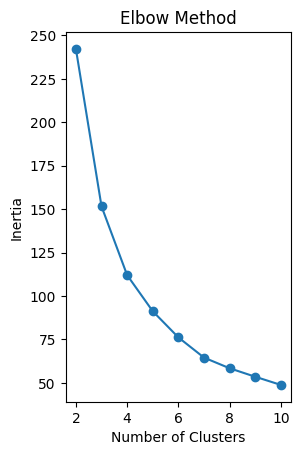

In [21]:
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# show the Silhouette Scores

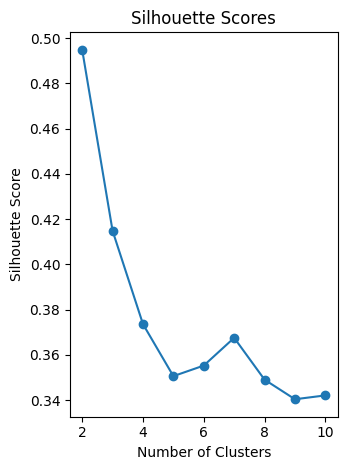

In [23]:

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the any optimal number of clusters

In [24]:
optimal_clusters = 4

In [25]:
optimal_clusters 

4

#  Fit KMeans with the optimal number of clusters

In [26]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(normalized_features)

C:\Users\ppp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Analyze the clusters

In [27]:
cluster_summary = customer_profiles.groupby('Cluster').agg({
    'TotalValue': 'mean',
    'TransactionID': 'mean',
    'Quantity': 'mean',
    'CustomerID': 'count'
}).reset_index()

cluster_summary.columns = ['Cluster', 'AverageTotalValue', 'AverageTransactions', 'AverageQuantity', 'CustomerCount']
print(cluster_summary)

   Cluster  AverageTotalValue  AverageTransactions  AverageQuantity   
0        0        4477.572041             6.306122        16.102041  \
1        1        2982.406711             4.394737        10.868421   
2        2        1273.368182             2.363636         5.272727   
3        3        6263.447333             8.433333        23.000000   

   CustomerCount  
0             49  
1             76  
2             44  
3             30  


# Visualize the clusters

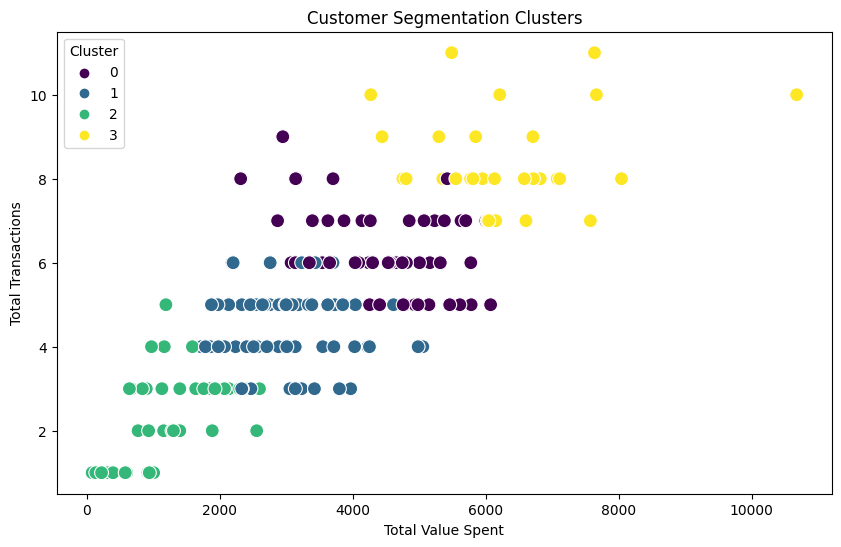

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profiles, x='TotalValue', y='TransactionID', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value Spent')
plt.ylabel('Total Transactions')
plt.legend(title='Cluster')
plt.show()